In [1]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("Gpu name: "+ gpu.name +"| GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=abbf23bc0403c1325aa53bc7f7926df315699360f653e8f8144c844d887706e5
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.8 GB  | Proc size: 157.1 MB
Gpu name: Tesla T4| GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB


In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [3]:
!git clone https://github.com/PotatoSpudowski/S.I.D.E.git
%cd S.I.D.E

Cloning into 'S.I.D.E'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 114 (delta 47), reused 95 (delta 28), pack-reused 0
Receiving objects: 100% (114/114), 5.97 MiB | 9.34 MiB/s, done.
Resolving deltas: 100% (47/47), done.
/content/S.I.D.E


In [0]:
!pip install efficientnet
!pip install annoy

In [5]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp '/content/drive/My Drive/GCC/custom_model_8_epoch.h5' '.'
!cp '/content/drive/My Drive/GCC/pascal_images.zip' '.'

In [0]:
!unzip 'pascal_images.zip' -d '.'

In [0]:
import os
import sys
import glob

sys.path.append('..')

from skimage import io
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.losses import CosineSimilarity
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split
from model.model import *
from index_search.index_search import *
from utils.utils import *

In [0]:
model = load_model('custom_model_8_epoch.h5')

In [0]:
sentence_encoder_model = get_sentence_encoder('4')

In [0]:
images = glob.glob('images/*.jpg')

In [11]:
%%time
features = extract_image_features(images, model)

100%|██████████| 1000/1000 [02:56<00:00,  5.67it/s]

CPU times: user 3min, sys: 1min 52s, total: 4min 52s
Wall time: 2min 56s


In [12]:
annoy_index = build_annoy_index(features, features[0].shape[0], 1000)

1000it [00:00, 11919.97it/s]


In [0]:
distances = nns_for_sentence('Cat sitting on a sofa', sentence_encoder_model, annoy_index, 20)

Similarity score: 0.7451205253601074


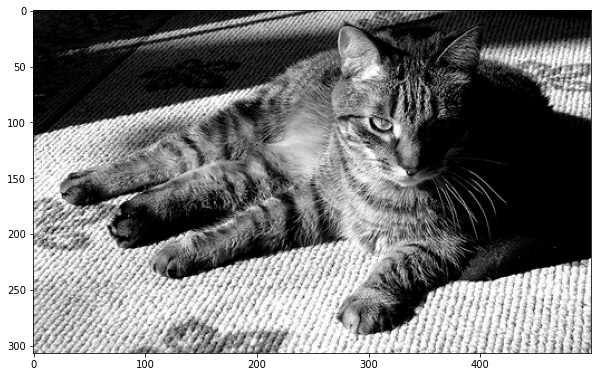

Similarity score: 0.7649378180503845


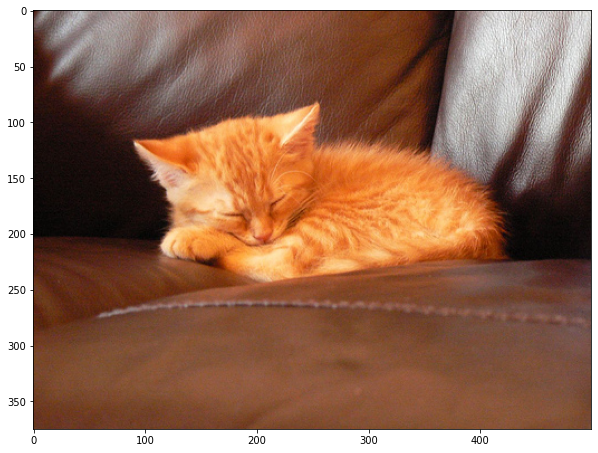

Similarity score: 0.7661243081092834


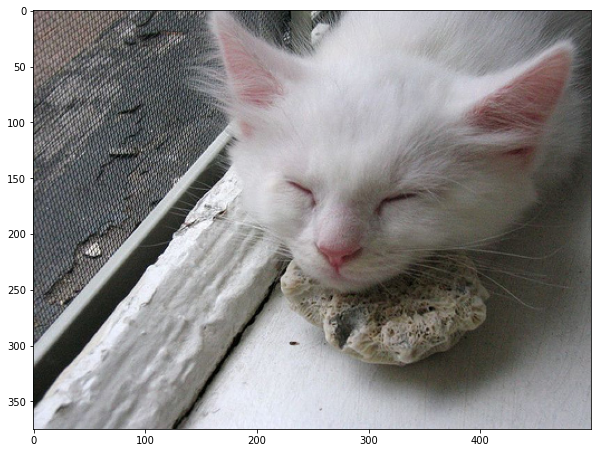

In [18]:
for i in range(3):
    image = io.imread(images[distances[0][i]])
    print("Similarity score: "+str(distances[1][i]))

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.show()

In [0]:
distances = nns_for_sentence('Ocean and boats', sentence_encoder_model, annoy_index, 20)

Similarity score: 0.9984098672866821


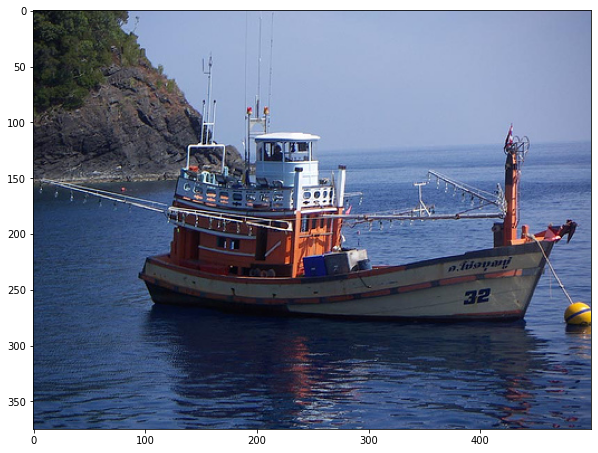

Similarity score: 1.00142502784729


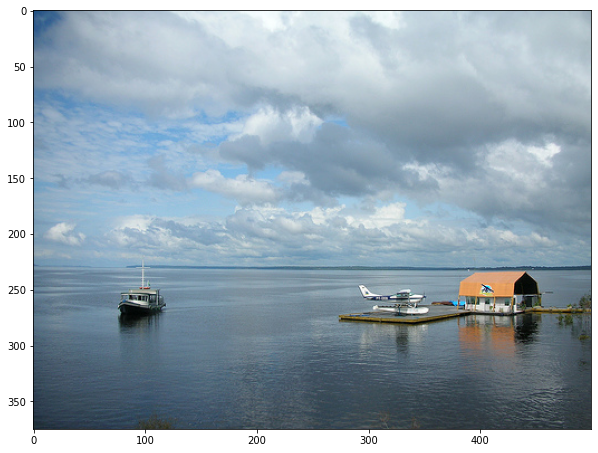

Similarity score: 1.0128259658813477


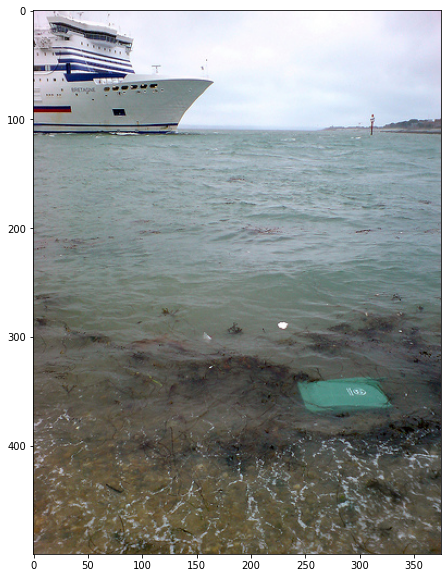

In [35]:
for i in range(3):
    image = io.imread(images[distances[0][i]])
    print("Similarity score: "+str(distances[1][i]))

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.show()